In [ ]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_ollama import ChatOllama
from langgraph.graph.message import add_messages
from typing import Annotated, TypedDict
import operator
from langgraph.checkpoint.memory import MemorySaver

In [3]:
model = ChatOllama(model='qwen3:1.7b')

In [4]:
class ChatState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages] # add_messages is more optimized to work with BaseMessage 
    

In [5]:
def chat(state: ChatState) -> ChatState:
    user_query = state['messages']
    # prompt = f"Your are a helpful chatbot, answer to the following query {user_query}"
    response = model.invoke(user_query)
    return {'messages': [response]}

In [ ]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)
graph.add_node('chat', chat)

graph.add_edge(START, 'chat')
graph.add_edge('chat', END)

workflow = graph.compile(checkpointer = checkpointer)

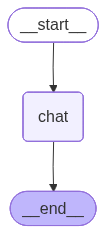

In [7]:
workflow

In [ ]:
result = workflow.invoke({"messages": [HumanMessage(content = "Hello!")]})
print(result)

{'messages': [HumanMessage(content='Hello!', additional_kwargs={}, response_metadata={}, id='251496bd-34b6-46f6-a985-a15c020ef3be'), AIMessage(content='Hello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'model': 'qwen3:1.7b', 'created_at': '2025-10-28T14:36:47.913131553Z', 'done': True, 'done_reason': 'stop', 'total_duration': 2883271559, 'load_duration': 1214105081, 'prompt_eval_count': 12, 'prompt_eval_duration': 77601327, 'eval_count': 93, 'eval_duration': 1524183580, 'model_name': 'qwen3:1.7b', 'model_provider': 'ollama'}, id='lc_run--a78270a7-93a7-4b6f-8759-61be454621dd-0', usage_metadata={'input_tokens': 12, 'output_tokens': 93, 'total_tokens': 105})]}


In [ ]:
thread_id = 1 # This basically refers to the chat id, where this helps to keep track of multiple user's chats by chat ids

while True:
    user_message = input('Type here...')
    print('User:', user_message)
    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    
    config = {'comfigurable': {'thread_id': thread_id}}
    
    #Invoking the workflow on every call, this deletes the previous state and re-writes it again
    response = workflow.invoke({"messages": [HumanMessage(content = {user_message})]}, config = config)
    print('AI:',  response['messages'][-1].content)

User: How are you
AI: Hello! I'm doing well, thanks. I'm here to help and always eager to assist. How can I support you today? 😊
User: What is your name
AI: I'm an AI assistant, and my name is **ChatGPT**. I'm developed by OpenAI and am designed to help with various tasks, answer questions, and provide assistance. While I don't have a physical form, I exist as a digital entity to support users in their needs. Let me know how I can help! 😊
User: But arent you qwen?
AI: No, I am not Qwen. I am Qwen, a large language model developed by Alibaba Cloud. While I share similar capabilities with Qwen, I am a distinct model. I can help with a wide range of tasks, such as answering questions, writing text, providing explanations, and more. Let me know if you have any questions or need assistance! 😊
User: But you said you are CHAT hpt
AI: I'm sorry for the confusion! I'm an AI assistant designed to help with various tasks and answer questions. If you have any questions or need assistance, feel fre